In [70]:
import os
import re
import numpy as np
from matplotlib import pyplot
import pandas
%matplotlib inline

def load_log(dir_):
    """Loads log from a directory and adds it to a list of dataframes."""
    header = ['step', 'pi', 'mu', 'posterior', 'loss']
    df = pandas.read_csv(os.path.join(dir_, 'log.csv'),
                         error_bad_lines=False,
                         warn_bad_lines=True, names=header,
                         engine='python', skiprows=1,
                         index_col=False)
    if not len(df):
        print("empty df at {}".format(dir_))
        return
    df['model'] = dir_[dir_.rfind('/') + 1: dir_.rfind('_')]
    return df

def load_logs(root):
    dfs = []
    i = 0
    for root, dirs, files in os.walk(root):
        for file_ in files:
            if file_ == 'log.csv':
                dfs.append(load_log(root))
    return dfs

In [105]:
df = load_logs('../logs_GMM')

In [106]:
df = pandas.concat(df, sort=True)

In [172]:
def title(model):
    'iwae_VIMCO_C8_R5.0_K2_nomu'
    elements = model.split('_')
    algo = elements[0]
    if algo == 'iwae':
        if elements[1] == 'VIMCO':
            algo = 'VIMCO'
        else:
            algo = 'REINFORCE'
    K = elements[-2][1:]
    return algo + K

def plot_all_runs(df, regex, quantity='loss', x_axis='step', window=1, color=None, forbidden=None, xlim=None):
    """Plot a group of runs defined by a regex."""
    pyplot.figure(figsize=(9, 5))

    df = df.dropna(subset=[quantity])
    
    if not isinstance(regex, list):
        regex = [regex]
        
    MARKERS = '+.D'

    kwargs = {}
    markers = {}
    if color:
        kwargs['color'] = color
    unique_models = df['model'].unique()
    models = []
    for i, reg in enumerate(regex):
        models += [m for m in unique_models if re.match(reg, m)]
        for m in unique_models:
            if re.match(reg, m):
                models.append(m)
                markers[m] = MARKERS[i]
    if forbidden is not None:
        models = [m for m in models if all([f not in m for f in forbidden])]
    #models = list(set(models))
    df_re = df[df['model'].isin(models)]
    
    min_x = None
    
    for model, df_model in df_re.groupby('model'):
        values = df_model[quantity]
        if window > 0:
            values = values.rolling(window).mean()
        pyplot.plot(df_model[x_axis],
                    values,
                    label=title(model), marker=markers[model], markevery=10,
                    **kwargs)
        print(model, df_model[x_axis].max())
        if min_x is None or df_model[x_axis].max() < min_x:
            min_x = df_model[x_axis].max()
            
    pyplot.xlim(0, xlim or min_x)

    pyplot.legend(loc=1)

iwae_None_C8_R5.0_K10_nomu 87800
iwae_None_C8_R5.0_K20_nomu 80300
iwae_None_C8_R5.0_K2_nomu 94800
iwae_None_C8_R5.0_K50_nomu 18700
iwae_None_C8_R5.0_K5_nomu 66600
iwae_VIMCO_C8_R5.0_K10_nomu 64000
iwae_VIMCO_C8_R5.0_K20_nomu 74500
iwae_VIMCO_C8_R5.0_K2_nomu 96100
iwae_VIMCO_C8_R5.0_K50_nomu 22400
iwae_VIMCO_C8_R5.0_K5_nomu 67000
rws_None_C8_R5.0_K10_nomu 75600
rws_None_C8_R5.0_K20_nomu 49400
rws_None_C8_R5.0_K2_nomu 52800
rws_None_C8_R5.0_K5_nomu 61900
rws_ws_C8_R5.0_K50_nomu 14000


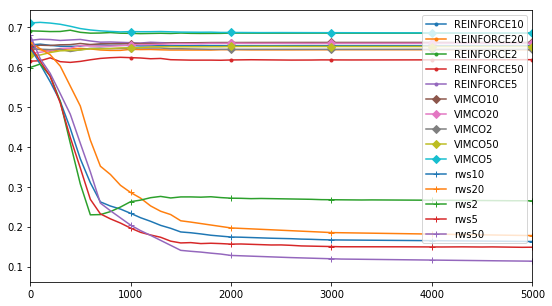

In [173]:
plot_all_runs(df, regex=['rws_.*R5.0_K.*._nomu*.',  'iwae_None.*R5.0_K.*._nomu*.', 'iwae_VIMCO.*R5.0_K.*._nomu*.'] ,
              quantity='posterior', window=1, forbidden=['ww', '200'], xlim=5000)

iwae_None_C8_R5.0_K20_nomu 80300
iwae_None_C8_R5.0_K2_nomu 94800
iwae_None_C8_R5.0_K5_nomu 66600
iwae_VIMCO_C8_R5.0_K20_nomu 74500
iwae_VIMCO_C8_R5.0_K2_nomu 96100
iwae_VIMCO_C8_R5.0_K5_nomu 67000
rws_None_C8_R5.0_K20_nomu 49400
rws_None_C8_R5.0_K2_nomu 52800
rws_None_C8_R5.0_K5_nomu 61900


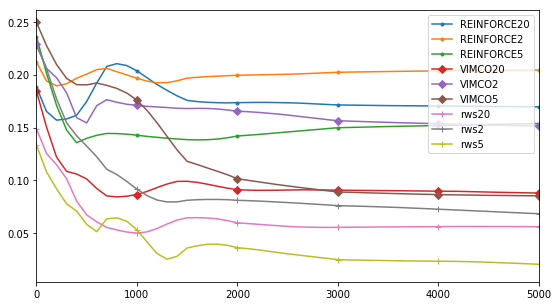

In [174]:
plot_all_runs(df, regex=['rws_.*R5.0_K.*._nomu*.',  'iwae_None.*R5.0_K.*._nomu*.', 'iwae_VIMCO.*R5.0_K.*._nomu*.'] ,
              quantity='pi', window=1, forbidden=['ww', '200', '50', '10'], xlim=5000)

iwae_None_C8_R20.0_K20_mu 56600
iwae_None_C8_R20.0_K2_mu 53300
iwae_None_C8_R20.0_K5_mu 70700
iwae_VIMCO_C8_R20.0_K20_mu 56200
iwae_VIMCO_C8_R20.0_K2_mu 53800
iwae_VIMCO_C8_R20.0_K5_mu 70100
rws_None_C8_R20.0_K20_mu 35700
rws_None_C8_R20.0_K2_mu 66100
rws_None_C8_R20.0_K5_mu 62200


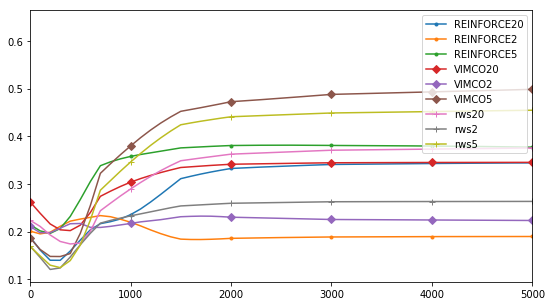

In [189]:
plot_all_runs(df, regex=['rws_.*R20.0_K.*._mu*.',  'iwae_None.*R20.0_K.*._mu*.', 'iwae_VIMCO.*R20.0_K.*._mu*.'] ,
              quantity='pi', window=1, forbidden=['ww', '200', '10', '50'], xlim=5000)

iwae_None_C8_R5.0_K10_nomu 87800
iwae_None_C8_R5.0_K200_nomu 15400
iwae_None_C8_R5.0_K20_nomu 80300
iwae_None_C8_R5.0_K2_nomu 94800
iwae_None_C8_R5.0_K50_nomu 18700
iwae_None_C8_R5.0_K5_nomu 66600
iwae_VIMCO_C8_R5.0_K10_nomu 64000
iwae_VIMCO_C8_R5.0_K200_nomu 5200
iwae_VIMCO_C8_R5.0_K20_nomu 74500
iwae_VIMCO_C8_R5.0_K2_nomu 96100
iwae_VIMCO_C8_R5.0_K50_nomu 22400
iwae_VIMCO_C8_R5.0_K5_nomu 67000


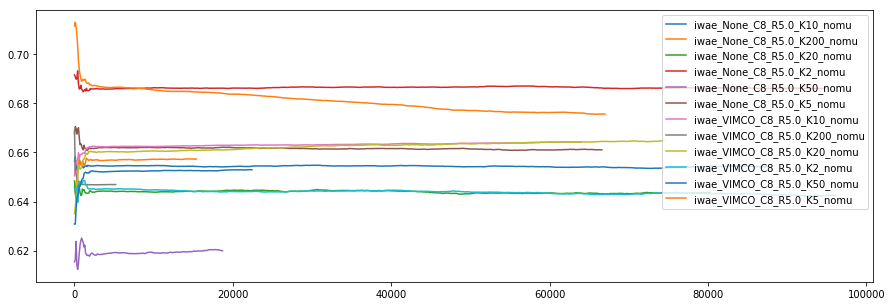

In [119]:
plot_all_runs(df, regex='iwae_.*R5.0_K.*._nomu*.', quantity='posterior', window=1, forbidden='ww')